In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import tree
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
# Read in data file for list
df = pd.read_csv(r'C:\Users\ancga\OneDrive\Desktop\Winter Term\452\Final Project\Bike Sharing\hour.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print(df.describe())
print(df.dtypes)

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [4]:
nulls = df.isnull().sum()
nulls[nulls !=0]

# No null values


Series([], dtype: int64)

In [5]:
### Variable Transformations

# Map weekday to categorical
weekday_dict = {0: "Sun", 1: "Mon", 2: "Tues", 3: "Weds", 4: "Thur", 5: "Fri", 6: "Sat"
}

adj_df=df.replace({"weekday": weekday_dict})


# Map season to categorical

season_dict = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

adj_df=adj_df.replace({"season": season_dict})


# Map month to categorical

month_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

adj_df=adj_df.replace({"mnth": month_dict})


# Map weather to categorical: 

weather_dict = {1: "Clear", 2: "Cloudy", 3: "LightPrecip"
                , 4: "HeavyPrecip"
}

adj_df=adj_df.replace({"weathersit": weather_dict})



# Create dummy variables - working day, holiday already dummy

# Weekday
wkdy_dummies = pd.get_dummies(adj_df["weekday"])

# Weather
weather_dummies = pd.get_dummies(adj_df["weathersit"])

# Season
season_dummies = pd.get_dummies(adj_df["season"])

# Month
month_dummies = pd.get_dummies(adj_df["mnth"])


# Create cyclical variables for hourly 
xhr = pd.DataFrame(adj_df["hr"].apply(lambda x: math.sin(2*math.pi*float(x)/24)))
yhr = pd.DataFrame(adj_df["hr"].apply(lambda x: math.cos(2*math.pi*float(x)/24)))

xhr.rename(columns = {'hr':'xhr'}, inplace = True)
yhr.rename(columns = {'hr':'yhr'}, inplace = True)

hr_vars = xhr.join(yhr)


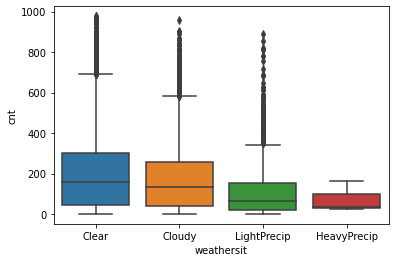

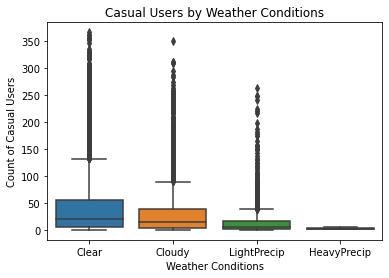

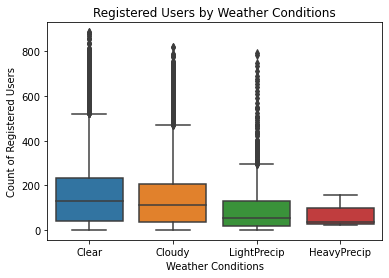

In [6]:
# Plots for user by weather situation
sns.boxplot( x=adj_df["weathersit"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["weathersit"], y=adj_df["casual"]).set_title("Casual Users by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Count of Casual Users")
plt.show()

sns.boxplot( x=adj_df["weathersit"], y=adj_df["registered"]).set_title("Registered Users by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Count of Registered Users")
plt.show()


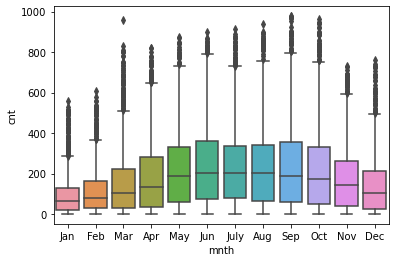

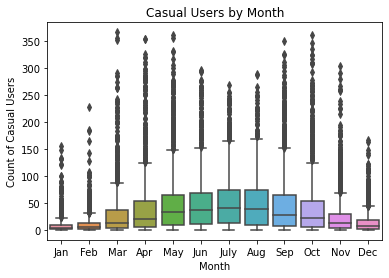

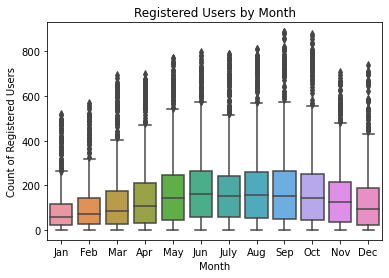

In [7]:
# Plots for user by month
sns.boxplot( x=adj_df["mnth"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["mnth"], y=adj_df["casual"]).set_title("Casual Users by Month")
plt.xlabel("Month")
plt.ylabel("Count of Casual Users")
plt.show()

sns.boxplot( x=adj_df["mnth"], y=adj_df["registered"]).set_title("Registered Users by Month")
plt.xlabel("Month")
plt.ylabel("Count of Registered Users")
plt.show()


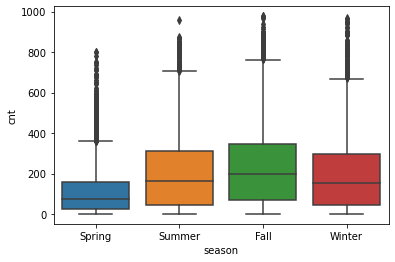

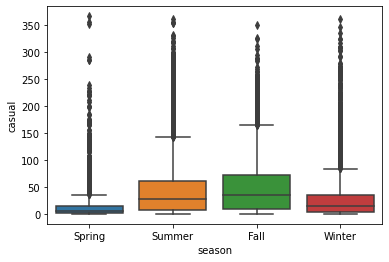

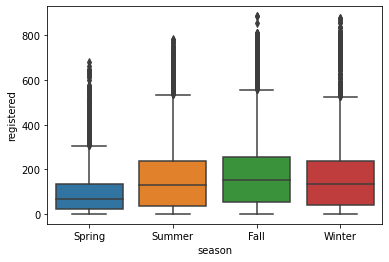

In [8]:
# Plots for users by season
sns.boxplot( x=adj_df["season"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["season"], y=adj_df["casual"])
plt.show()

sns.boxplot( x=adj_df["season"], y=adj_df["registered"])
plt.show()


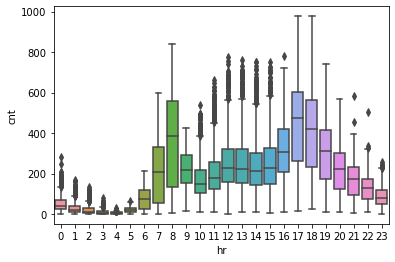

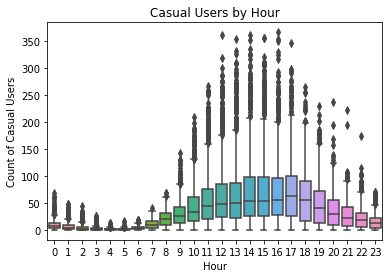

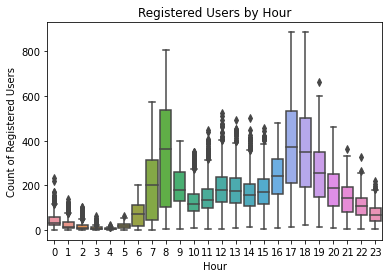

In [9]:
# Plots for users by hour
sns.boxplot( x=adj_df["hr"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["hr"], y=adj_df["casual"]).set_title("Casual Users by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Casual Users")
plt.show()


sns.boxplot( x=adj_df["hr"], y=adj_df["registered"]).set_title("Registered Users by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Registered Users")
plt.show()

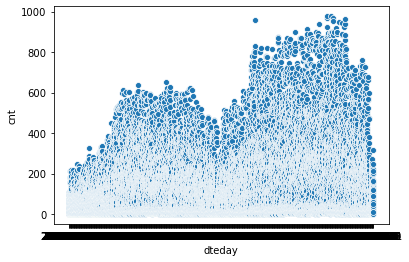

In [10]:
sns.scatterplot(x = adj_df["dteday"], y = adj_df['cnt'])
plt.show()

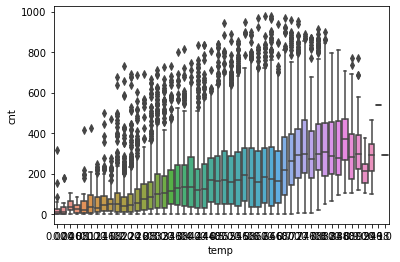

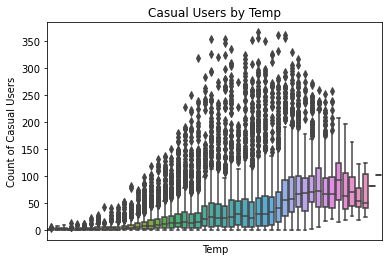

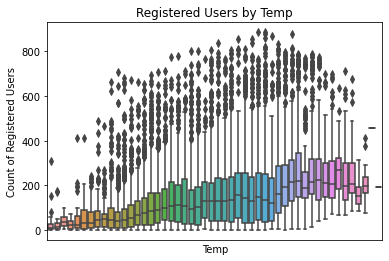

In [11]:
# Plots for users by temperature
sns.boxplot( x=adj_df["temp"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["temp"], y=adj_df["casual"]).set_title("Casual Users by Temp")
plt.xlabel("Temp")
plt.ylabel("Count of Casual Users")
plt.xticks([])
plt.show()


sns.boxplot( x=adj_df["temp"], y=adj_df["registered"]).set_title("Registered Users by Temp")
plt.xlabel("Temp")
plt.ylabel("Count of Registered Users")
plt.xticks([])
plt.show()

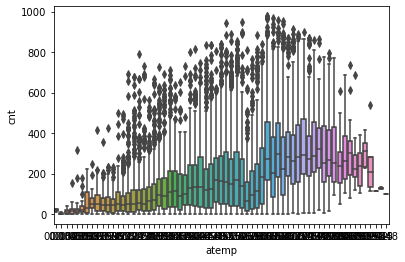

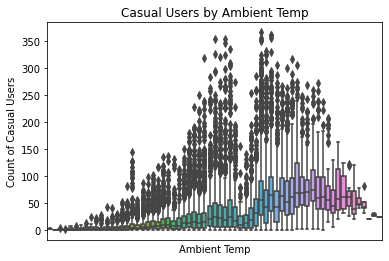

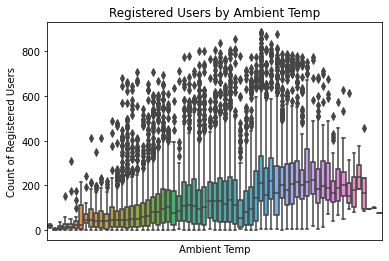

In [12]:
# Plots for users by temperature
sns.boxplot( x=adj_df["atemp"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["atemp"], y=adj_df["casual"]).set_title("Casual Users by Ambient Temp")
plt.xlabel("Ambient Temp")
plt.ylabel("Count of Casual Users")
plt.xticks([])
plt.show()


sns.boxplot( x=adj_df["atemp"], y=adj_df["registered"]).set_title("Registered Users by Ambient Temp")
plt.xlabel("Ambient Temp")
plt.ylabel("Count of Registered Users")
plt.xticks([])
plt.show()

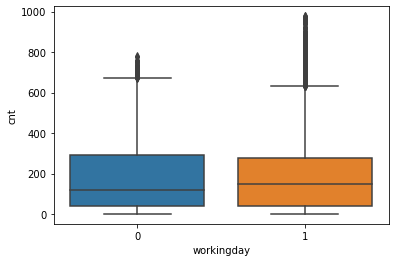

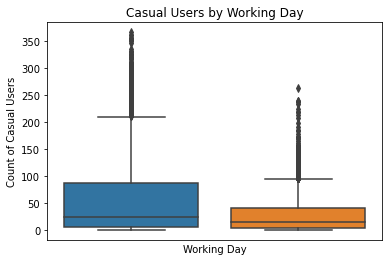

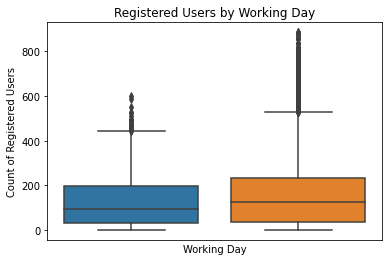

In [13]:
# Plots for users by workingday
sns.boxplot( x=adj_df["workingday"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["workingday"], y=adj_df["casual"]).set_title("Casual Users by Working Day")
plt.xlabel("Working Day")
plt.ylabel("Count of Casual Users")
plt.xticks([])
plt.show()


sns.boxplot( x=adj_df["workingday"], y=adj_df["registered"]).set_title("Registered Users by Working Day")
plt.xlabel("Working Day")
plt.ylabel("Count of Registered Users")
plt.xticks([])
plt.show()

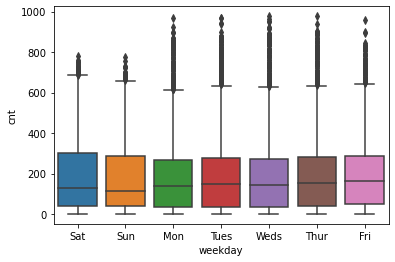

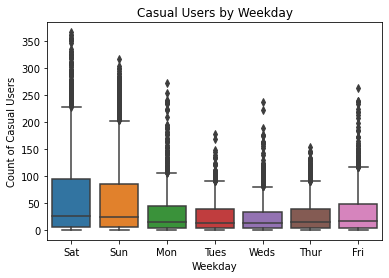

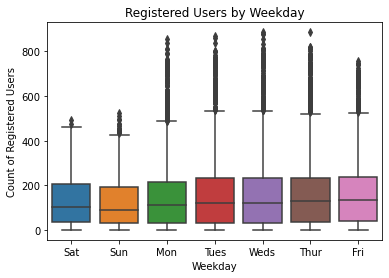

In [14]:
# Plots for users by weekday
sns.boxplot( x=adj_df["weekday"], y=adj_df["cnt"])
plt.show()

sns.boxplot( x=adj_df["weekday"], y=adj_df["casual"]).set_title("Casual Users by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count of Casual Users")
plt.show()


sns.boxplot( x=adj_df["weekday"], y=adj_df["registered"]).set_title("Registered Users by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count of Registered Users")
plt.show()

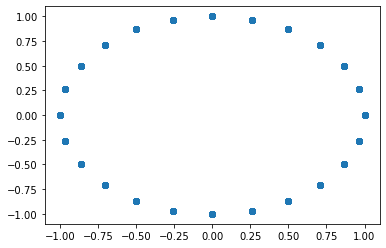

In [15]:
# Confirm cyclical variable transformation working & non-overlapping
plt.scatter(xhr, yhr)

In [16]:
# create df for X vars
data = adj_df

# drop unecessary variables and categorical for dummy replace
data = data.drop(['instant', 'dteday', 'yr', 'hr', 'weekday', 'casual', 'registered', 'season', 'mnth', 'weathersit'], axis=1, inplace=False)

# replace with dummies/cyclical variables
data = data.join(hr_vars)
data = data.join(wkdy_dummies)
data = data.join(month_dummies)
data = data.join(weather_dummies)

print(data.head())

   holiday  workingday  temp   atemp   hum  windspeed  cnt       xhr  \
0        0           0  0.24  0.2879  0.81        0.0   16  0.000000   
1        0           0  0.22  0.2727  0.80        0.0   40  0.258819   
2        0           0  0.22  0.2727  0.80        0.0   32  0.500000   
3        0           0  0.24  0.2879  0.75        0.0   13  0.707107   
4        0           0  0.24  0.2879  0.75        0.0    1  0.866025   

        yhr  Fri  ...  Jun  Mar  May  Nov  Oct  Sep  Clear  Cloudy  \
0  1.000000    0  ...    0    0    0    0    0    0      1       0   
1  0.965926    0  ...    0    0    0    0    0    0      1       0   
2  0.866025    0  ...    0    0    0    0    0    0      1       0   
3  0.707107    0  ...    0    0    0    0    0    0      1       0   
4  0.500000    0  ...    0    0    0    0    0    0      1       0   

   HeavyPrecip  LightPrecip  
0            0            0  
1            0            0  
2            0            0  
3            0            

In [17]:
# Regression formula & fit - no interaction
y = data['cnt']
X ="+".join(data.columns.difference(['y']))

print(X)


formula = "y~" + X
lm = sm.ols(formula=formula, data = data)
res = lm.fit()

# Print output
print(res.summary())

Apr+Aug+Clear+Cloudy+Dec+Feb+Fri+HeavyPrecip+Jan+July+Jun+LightPrecip+Mar+May+Mon+Nov+Oct+Sat+Sep+Sun+Thur+Tues+Weds+atemp+cnt+holiday+hum+temp+windspeed+workingday+xhr+yhr
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.645e+30
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:21:12   Log-Likelihood:             4.4702e+05
No. Observations:               17379   AIC:                        -8.940e+05
Df Residuals:                   17350   BIC:                        -8.938e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err    

In [18]:
X_vars = data.drop(['cnt'], axis=1, inplace=False)
y_var = data['cnt']


# Lasso Regression
train_per = 0.70

## Model A
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X_vars, y_var, test_size=(1-train_per), random_state=42)


reg = Lasso(alpha = 1)
model_lasso = reg.fit(X_train, y_train)


print('Model R_sq train: ', round(reg.score(X_train, y_train), 4))
print('Model R_sq test: ', round(reg.score(X_test, y_test), 4))


# Find variables used in models
coeff = pd.DataFrame(reg.coef_, X_vars.columns, columns=['Coefficient'])
print(coeff.loc[coeff['Coefficient'] != 0])


#-------------------------------- 
# Results from Lasso with CV

print("\n\n\nLasso with CV\n")

model = LassoCV(cv=10, random_state=0, max_iter=10000)

model.fit(X_train, y_train)

# Use best alpha for lasso regression
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

# Look at OOS 
print('Model R_sq train: ', round(lasso_best.score(X_train, y_train), 4))
print('Model R_sq test: ', round(lasso_best.score(X_test, y_test), 4))

# Print coefficients
coeff = pd.DataFrame(lasso_best.coef_, X_vars.columns, columns=['Coefficient'])
print(coeff.loc[coeff['Coefficient'] != 0])




Model R_sq train:  0.4405
Model R_sq test:  0.4484
             Coefficient
workingday      3.736752
temp          193.047239
hum           -30.615309
xhr           -90.516364
yhr           -95.611770
Mon            -2.141384
Sun            -0.805917
Dec            -0.405781
Feb           -32.751389
Jan           -38.362368
July           -1.109233
Mar            -9.474745
May             3.139924
Oct            26.003398
Sep            19.258837
Clear          15.992853
LightPrecip   -49.977087



Lasso with CV

Model R_sq train:  0.4479
Model R_sq test:  0.453
             Coefficient
holiday       -19.054567
workingday      9.183288
temp          129.852840
atemp          97.911751
hum           -77.249521
windspeed     -37.108194
xhr           -87.989939
yhr           -94.287205
Fri             2.869658
Mon            -7.393200
Sat             8.291229
Sun            -3.430566
Thur           -2.449314
Apr             6.651010
Dec            -4.475506
Feb           -39.652636
Jan   




Random Forest

Out of Sample: 67.26929016660617
In Sample: 25.931596550673333
Out of Sample: 0.8567572976908493
In Sample: 0.9798969302477425


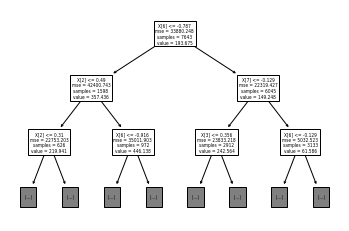

<Figure size 432x288 with 0 Axes>

In [19]:
# Results from Random Forest

print("\n\n\nRandom Forest\n")

# Create random forest regressor
rf = RandomForestRegressor(n_estimators = 100, bootstrap = True, random_state = 42)

# Fit 
rf.fit(X_train, y_train) 

pred = rf.predict(X_test)
pred_train = rf.predict(X_train)


#calculate RMSE
print("Out of Sample: " + str(sqrt(mean_squared_error(y_test, pred))))

print("In Sample: " + str(sqrt(mean_squared_error(y_train, pred_train))))


# Calculate R2

print("Out of Sample: " + str(metrics.r2_score(y_test, pred)))
print("In Sample: " + str(metrics.r2_score(y_train, pred_train)))


# RMSE for OOS far worse

tree.plot_tree(rf.estimators_[1], max_depth=2)
plt.show()

plt.savefig('out.pdf')

In [20]:
# Get variable importance from random forest
importance = list(rf.feature_importances_)

a = []
for i in X_train.columns: 
    a.append(i)

importance_list = pd.DataFrame(
    {'variable': a,
     'importance': importance,
    })
importance_list = importance_list.sort_values(by='importance', ascending = False)
print(importance_list)

       variable  importance
6           xhr    0.303625
7           yhr    0.264392
2          temp    0.133327
1    workingday    0.075778
4           hum    0.054916
3         atemp    0.049022
5     windspeed    0.028925
30  LightPrecip    0.017490
24          Nov    0.006776
8           Fri    0.006187
25          Oct    0.005099
26          Sep    0.005070
22          Mar    0.004117
15          Apr    0.003633
14         Weds    0.003592
12         Thur    0.003533
9           Mon    0.003449
27        Clear    0.003364
18          Feb    0.003215
17          Dec    0.002896
13         Tues    0.002890
28       Cloudy    0.002482
23          May    0.002449
21          Jun    0.002293
16          Aug    0.002293
10          Sat    0.002224
20         July    0.002101
11          Sun    0.002014
0       holiday    0.001813
19          Jan    0.001033
29  HeavyPrecip    0.000002


In [21]:
# Examine registered instead of total
# create df for X vars
data_registered = adj_df

# drop unecessary variables and categorical for dummy replace
data_registered = data_registered.drop(['instant', 'dteday', 'yr', 'hr', 'weekday', 'casual', 'cnt', 'season', 'mnth', 'weathersit'], axis=1, inplace=False)

# replace with dummies/cyclical variables
data_registered = data_registered.join(hr_vars)
data_registered = data_registered.join(wkdy_dummies)
data_registered = data_registered.join(month_dummies)
data_registered = data_registered.join(weather_dummies)


# Regression formula & fit - no interaction
y = data_registered['registered']
X ="+".join(data_registered.columns.difference(['y']))


formula = "y~" + X
lm = sm.ols(formula=formula, data = data_registered)
res = lm.fit()

# Print output
print(res.summary())

print("\n\n\nRegistered Users - Lasso without CV\n")
# Lasso 
X_vars = data_registered.drop(['registered'], axis=1, inplace=False)
y_var = data_registered['registered']


# Lasso Regression
train_per = 0.70

## Model A
# Split test and train data_registered 
X_train, X_test, y_train, y_test = train_test_split(X_vars, y_var, test_size=(1-train_per), random_state=42)


reg = Lasso(alpha = 1)
model_lasso = reg.fit(X_train, y_train)


print('Model R_sq train: ', round(reg.score(X_train, y_train), 4))
print('Model R_sq test: ', round(reg.score(X_test, y_test), 4))


# Find variables used in models
coeff = pd.DataFrame(reg.coef_, X_vars.columns, columns=['Coefficient'])
print(coeff.loc[coeff['Coefficient'] != 0])



#-------------------------------- 
# Results from Lasso with CV

print("\n\n\nRegistered Users - Lasso with CV\n")

model = LassoCV(cv=10, random_state=0, max_iter=10000)

model.fit(X_train, y_train)

# Use best alpha for lasso regression
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

# Look at OOS 
print('Model R_sq train: ', round(lasso_best.score(X_train, y_train), 4))
print('Model R_sq test: ', round(lasso_best.score(X_test, y_test), 4))

# Print coefficients
coeff = pd.DataFrame(lasso_best.coef_, X_vars.columns, columns=['Coefficient'])
print(coeff.loc[coeff['Coefficient'] != 0])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.004e+30
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:21:23   Log-Likelihood:             4.5056e+05
No. Observations:               17379   AIC:                        -9.011e+05
Df Residuals:                   17350   BIC:                        -9.008e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.821e-13    1.3e-13     -5.256      




Random Forest

Out of Sample: 58.76749742260046
In Sample: 22.455927115893797
Out of Sample: 0.8423395559828696
In Sample: 0.9783856001263904


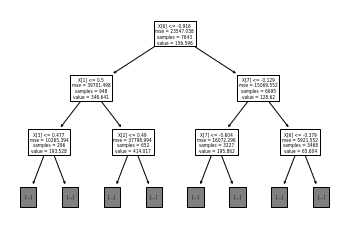

In [22]:
# Results from Random Forest

print("\n\n\nRandom Forest\n")

# Create random forest regressor
rf = RandomForestRegressor(n_estimators = 100, bootstrap = True, random_state = 42)

# Fit 
rf.fit(X_train, y_train) 

pred = rf.predict(X_test)
pred_train = rf.predict(X_train)

#calculate RMSE
print("Out of Sample: " + str(sqrt(mean_squared_error(y_test, pred))))

print("In Sample: " + str(sqrt(mean_squared_error(y_train, pred_train))))


# Calculate R2

print("Out of Sample: " + str(metrics.r2_score(y_test, pred)))
print("In Sample: " + str(metrics.r2_score(y_train, pred_train)))


# RMSE for OOS far worse

tree.plot_tree(rf.estimators_[1], max_depth=2)
plt.show()

In [23]:
# Get variable importance from random forest
importance = list(rf.feature_importances_)

a = []
for i in X_train.columns: 
    a.append(i)

importance_list = pd.DataFrame(
    {'variable': a,
     'importance': importance,
    })
importance_list = importance_list.sort_values(by='importance', ascending = False)
print(importance_list)

       variable  importance
6           xhr    0.325450
7           yhr    0.229273
1    workingday    0.125666
2          temp    0.089228
3         atemp    0.052248
4           hum    0.052054
5     windspeed    0.029617
30  LightPrecip    0.018527
8           Fri    0.006989
24          Nov    0.006974
26          Sep    0.006970
25          Oct    0.005736
9           Mon    0.004832
22          Mar    0.004537
15          Apr    0.003909
12         Thur    0.003902
14         Weds    0.003796
17          Dec    0.003720
27        Clear    0.003615
13         Tues    0.003427
18          Feb    0.002986
28       Cloudy    0.002817
23          May    0.002293
21          Jun    0.002085
16          Aug    0.002057
20         July    0.001980
11          Sun    0.001493
0       holiday    0.001418
10          Sat    0.001392
19          Jan    0.001008
29  HeavyPrecip    0.000002


In [24]:
# Examine casual instead of total
# create df for X vars
data_casual = adj_df

# drop unecessary variables and categorical for dummy replace
data_casual = data_casual.drop(['instant', 'dteday', 'yr', 'hr', 'weekday', 'registered', 'cnt', 'season', 'mnth', 'weathersit'], axis=1, inplace=False)

# replace with dummies/cyclical variables
data_casual = data_casual.join(hr_vars)
data_casual = data_casual.join(wkdy_dummies)
data_casual = data_casual.join(month_dummies)
data_casual = data_casual.join(weather_dummies)


# Regression formula & fit - no interaction
y = data_casual['casual']
X ="+".join(data_casual.columns.difference(['y']))

print(X)


formula = "y~" + X
lm = sm.ols(formula=formula, data = data_casual)
res = lm.fit()

# Print output
print(res.summary())

print("\n\n\nCasual Users - Lasso without CV\n")
# Lasso 
X_vars = data_casual.drop(['casual'], axis=1, inplace=False)
y_var = data_casual['casual']


# Lasso Regression
train_per = 0.70

## Model A
# Split test and train data_casual 
X_train, X_test, y_train, y_test = train_test_split(X_vars, y_var, test_size=(1-train_per), random_state=42)


reg = Lasso(alpha = 1)
model_lasso = reg.fit(X_train, y_train)


print('Model R_sq train: ', round(reg.score(X_train, y_train), 4))
print('Model R_sq test: ', round(reg.score(X_test, y_test), 4))


# Find variables used in models
coeff = pd.DataFrame(reg.coef_, X_vars.columns, columns=['Coefficient'])
print(coeff.loc[coeff['Coefficient'] != 0])



#-------------------------------- 
# Results from Lasso with CV

print("\n\n\nCasual Users - Lasso with CV\n")

model = LassoCV(cv=10, random_state=0, max_iter=10000)

model.fit(X_train, y_train)

# Use best alpha for lasso regression
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

# Look at OOS 
print('Model R_sq train: ', round(lasso_best.score(X_train, y_train), 4))
print('Model R_sq test: ', round(lasso_best.score(X_test, y_test), 4))

# Print coefficients
coeff = pd.DataFrame(lasso_best.coef_, X_vars.columns, columns=['Coefficient'])
print(coeff.loc[coeff['Coefficient'] != 0])





Apr+Aug+Clear+Cloudy+Dec+Feb+Fri+HeavyPrecip+Jan+July+Jun+LightPrecip+Mar+May+Mon+Nov+Oct+Sat+Sep+Sun+Thur+Tues+Weds+atemp+casual+holiday+hum+temp+windspeed+workingday+xhr+yhr
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.479e+31
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:21:31   Log-Likelihood:             4.7539e+05
No. Observations:               17379   AIC:                        -9.507e+05
Df Residuals:                   17350   BIC:                        -9.505e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err 




Random Forest

Out of Sample: 16.47595663230302
In Sample: 6.505458310131393
Out of Sample: 0.8872458393633155
In Sample: 0.9826589657949732


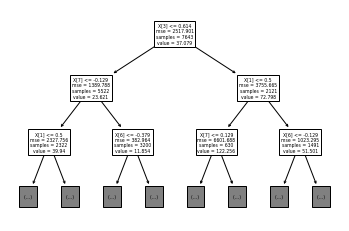

In [25]:
# Results from Random Forest

print("\n\n\nRandom Forest\n")

# Create random forest regressor
rf = RandomForestRegressor(n_estimators = 100, bootstrap = True, random_state = 42)

# Fit 
rf.fit(X_train, y_train) 

pred = rf.predict(X_test)
pred_train = rf.predict(X_train)

#calculate RMSE
print("Out of Sample: " + str(sqrt(mean_squared_error(y_test, pred))))

print("In Sample: " + str(sqrt(mean_squared_error(y_train, pred_train))))



# Calculate R2

print("Out of Sample: " + str(metrics.r2_score(y_test, pred)))
print("In Sample: " + str(metrics.r2_score(y_train, pred_train)))


# RMSE for OOS far worse

tree.plot_tree(rf.estimators_[1], max_depth=2)
plt.show()

In [26]:
# Get variable importance from random forest
importance = list(rf.feature_importances_)

a = []
for i in X_train.columns: 
    a.append(i)

importance_list = pd.DataFrame(
    {'variable': a,
     'importance': importance,
    })
importance_list = importance_list.sort_values(by='importance', ascending = False)
print(importance_list)

       variable    importance
3         atemp  2.402766e-01
1    workingday  1.699020e-01
6           xhr  1.681524e-01
7           yhr  1.668364e-01
2          temp  8.247229e-02
4           hum  6.254969e-02
5     windspeed  2.769156e-02
27        Clear  7.706340e-03
8           Fri  7.293557e-03
22          Mar  6.831146e-03
10          Sat  6.796169e-03
23          May  6.085992e-03
15          Apr  5.444779e-03
25          Oct  4.081439e-03
16          Aug  3.995737e-03
0       holiday  3.589375e-03
30  LightPrecip  3.394896e-03
24          Nov  3.341919e-03
14         Weds  3.117507e-03
26          Sep  2.974614e-03
11          Sun  2.438606e-03
21          Jun  2.273707e-03
20         July  2.232472e-03
9           Mon  2.064977e-03
28       Cloudy  2.044320e-03
18          Feb  1.984298e-03
12         Thur  1.264289e-03
17          Dec  1.134574e-03
19          Jan  1.102290e-03
13         Tues  9.259196e-04
29  HeavyPrecip  1.154021e-07
